## NAME: ADEDAYO A. ADEDIRAN

    
## PROJECT 1 

Introduction: I analyzed the movie dataset. The dataset contains 10866 movies described over 21 features. After checking for errors and outliers, and cleaning accordingly, the dataset remained 3653 movies and 16 features, of which I attempted to answer the following questions:

1. How does the median budget compare to the mean budget?

2. What does the budget distribution look like?

3. What are the 10 most expensive movies in the dataset?

4. Are those movies profitable?

5. What is the relationship between budget and revenue?

6. What is the trend of movie budgets across the years?

7. What are the top 10 grossing movies?

8. Did returns on movie increase over the years?

9. What are the most successful movies?

10. Which movies are the least successful?

11. Who are the most successful directors?

12. 1.	Which director brought in the highest average revenue?

13. Which companies generated the most revenues in the dataset?

14. Which movies have the most votes in the dataset?

15. Which movies are the most popular in the dataset?

16. Is there a correlation between popularity and revenue generated?

17. Did heavily budgeted movies turn out popular?

18. What is the mean rating for all movies based on the voting averages?

19. What is the minimum votes required to be in the top chart given a 95% percentile?

20. How many movies were released in each month in the dataset?

30. Which month do movies generate the most revenue?

31. Which month did movies recorded the highest profit rate?

32. Did movie runtime increase over the years?

33. What are the shortest movies ever produced?

34. What are the longest movies ever produced?

35. How correlated are the features measured in the dataset?

In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler

import plotly.express as px

from sklearn.metrics.pairwise import linear_kernel

In [3]:
#uploading the moviedataset

moviedata = pd.read_csv("/Users/adedayo/Desktop/ALX-T/tmdb-movies.csv", header = 0, na_values = (' ', 'NULL'))

## Understanding the dataset

In [4]:
moviedata.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year   budget_adj   revenue_adj  
0           6.5          2015  137999939.3  1.392446e+09  
1           7.1          2015  137999939.3  3.481613e+08  
2           6.3          2015  101199955.5  2.716190e+08  
3           7.5          2015  183999919.0  1.902723e+09  
4           7.3          2015  174799923.1  1.385749e+09  

[5 rows x 21 columns]

In [5]:
moviedata.shape

(10866, 21)

The dataset includes 10866 and 21 features

In [6]:
moviedata.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

The features used in the dataset are:
id,
imb_id,
Popularity,
Budget,
revenue,
original_title,
cast,
Homepage,
Director,
Tagline,
Keywords,
Overview,
Runtime,
Genres,
Production_companies,
Release_date,
Vote_count,
Vote_average,
Release_year,
Budget_adj,
Revenue_adj.

I do not need certain features listed on the dataset, so I will drop them to make my analysis easier and neater

## Cleaning the Dataset

In [7]:
#dropping the columns not useful to my analysis :

moviedata.drop(['imdb_id','homepage', 'budget', 'revenue', 'tagline'],axis=1,inplace=True)

The revenue_adj and budget columns use scientific notations for the number of zeros. Suppressing the notations will further ease my analysis 

In [8]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

I need to check for non-null values and the data types of the columns in the dataset to make sure the columns are ready for analysis

In [9]:
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   original_title        10866 non-null  object 
 3   cast                  10790 non-null  object 
 4   director              10822 non-null  object 
 5   keywords              9373 non-null   object 
 6   overview              10862 non-null  object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  budget_adj            10866 non-null  float64
 15  revenue_adj        

Interestingly none of the columns has null values, which is good news. However, a few columns have the wrong data types ascribed to them. I will modify them accordingly.

In [10]:
#converting release_year and id to object :

moviedata['release_year'] = moviedata['release_year'].astype(object)

moviedata['id'] = moviedata['id'].astype(object)

In [11]:
#Renaming some of the columns to ease my analysis:

moviedata.rename(columns={'budget_adj': 'budget',
                   'revenue_adj': 'revenue',
                   'original_title': 'title'
                   },
          inplace=True, errors='raise')

Next, I will count the number of unique values in the dataset

In [12]:
moviedata.nunique(axis = 0)

id                      10865
popularity              10814
title                   10571
cast                    10719
director                 5067
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget                   2614
revenue                  4840
dtype: int64

Next, I will check for possible duplication of values

In [13]:
moviedata.duplicated().value_counts()

False    10865
True         1
dtype: int64

There is one duplicated value in the dataset, so I will drop the value.

In [14]:
moviedata = moviedata.drop_duplicates()

Checking for null values in the dataset

In [15]:
moviedata.isnull().sum()

id                         0
popularity                 0
title                      0
cast                      76
director                  44
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget                     0
revenue                    0
dtype: int64

In [16]:
#dropping the null values:

moviedata.dropna(inplace=True)

Checking for summary stats to find out possible outliers

In [17]:
moviedata.describe()

popularity  runtime  vote_count  vote_average       budget  \
count     8666.00  8666.00     8666.00       8666.00      8666.00   
mean         0.74   103.82      264.20          6.00  21307490.97   
std          1.09    26.21      635.20          0.89  37102690.20   
min          0.00     0.00       10.00          1.50         0.00   
25%          0.25    91.00       20.00          5.50         0.00   
50%          0.45   100.00       54.00          6.10   2130702.68   
75%          0.84   113.00      200.00          6.60  28104657.57   
max         32.99   705.00     9767.00          8.70 425000000.00   

            revenue  
count       8666.00  
mean    63624403.82  
std    159287366.71  
min            0.00  
25%            0.00  
50%       189123.75  
75%     55248572.50  
max   2827123750.00

The summary statistics above shows there are zero values in the budget, which in reality, is not possible. The zero values most likely come from poor data collection. To improve the reliability of my analysis, I will be using 7,000 dollars as the minimum for budget and 30 dollars for the revenue. These values according to Google are the lowest ever recorded movie budget and revenue values in history.

In [18]:
moviedata = moviedata[moviedata['budget'] > 6999]  

moviedata = moviedata[moviedata['revenue'] > 29] 

Checking the final copy of the dataset before the exploratory analysis

In [19]:
moviedata

id  popularity                            title  \
0      135397       32.99                   Jurassic World   
1       76341       28.42               Mad Max: Fury Road   
2      262500       13.11                        Insurgent   
3      140607       11.17     Star Wars: The Force Awakens   
4      168259        9.34                        Furious 7   
...       ...         ...                              ...   
10822     396        0.67  Who's Afraid of Virginia Woolf?   
10828    5780        0.40                     Torn Curtain   
10829    6644        0.40                        El Dorado   
10835    5923        0.30                 The Sand Pebbles   
10848    2161        0.21                 Fantastic Voyage   

                                                    cast           director  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...    Colin Trevorrow   
1      Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...      George Miller   
2      Shailene Woodley|Theo James|Kate Winslet|Ansel...   Robert Schwentke   
3      Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...        J.J. Abrams   
4      Vin Diesel|Paul Walker|Jason Statham|Michelle ...          James Wan   
...                                                  ...                ...   
10822  Elizabeth Taylor|Richard Burton|George Segal|S...       Mike Nichols   
10828  Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...   Alfred Hitchcock   
10829  John Wayne|Robert Mitchum|James Caan|Charlene ...       Howard Hawks   
10835  Steve McQueen|Richard Attenborough|Richard Cre...        Robert Wise   
10848  Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...  Richard Fleischer   

                                                keywords  \
0      monster|dna|tyrannosaurus rex|velociraptor|island   
1       future|chase|post-apocalyptic|dystopia|australia   
2      based on novel|revolution|dystopia|sequel|dyst...   
3                  android|spaceship|jedi|space opera|3d   
4                    car race|speed|revenge|suspense|car   
...                                                  ...   
10822      alcohol|adultery|professor|married couple|son   
10828                              cold war|east germany   
10829              sheriff|ranch|liquor|settler|revolver   
10835            missionary|china|us navy|chinese|battle   
10848          submarine|coma|claustrophobia|wound|laser   

                                                overview  runtime  \
0      Twenty-two years after the events of Jurassic ...      124   
1      An apocalyptic story set in the furthest reach...      120   
2      Beatrice Prior must confront her inner demons ...      119   
3      Thirty years after defeating the Galactic Empi...      136   
4      Deckard Shaw seeks revenge against Dominic Tor...      137   
...                                                  ...      ...   
10822  Mike Nicholsâ€™ film from Edward Albee's play ...      131   
10828  An American scientist publicly defects to East...      128   
10829  Cole Thornton, a gunfighter for hire, joins fo...      120   
10835  Engineer Jake Holman arrives aboard the gunboa...      182   
10848  The science of miniaturization has been unlock...      100   

                                          genres  \
0      Action|Adventure|Science Fiction|Thriller   
1      Action|Adventure|Science Fiction|Thriller   
2             Adventure|Science Fiction|Thriller   
3       Action|Adventure|Science Fiction|Fantasy   
4                          Action|Crime|Thriller   
...                                          ...   
10822                                      Drama   
10828                           Mystery|Thriller   
10829                             Action|Western   
10835         Action|Adventure|Drama|War|Romance   
10848                  Adventure|Science Fiction   

                                    production_companies release_date  \
0      Universal Studios|Amblin Entertainment|Legenda...       6/9/15

In [20]:
moviedata.describe()

popularity  runtime  vote_count  vote_average       budget  \
count     3653.00  3653.00     3653.00       3653.00      3653.00   
mean         1.23   109.60      550.73          6.19  45652832.34   
std          1.50    19.86      897.05          0.79  45214412.13   
min          0.01    26.00       10.00          2.20      7755.18   
25%          0.48    96.00       79.00          5.70  14040500.29   
50%          0.84   106.00      223.00          6.20  31341561.28   
75%          1.41   120.00      600.00          6.70  62160970.18   
max         32.99   338.00     9767.00          8.40 425000000.00   

            revenue  
count       3653.00  
mean   142955209.94  
std    219943362.87  
min           48.38  
25%     20848013.80  
50%     66367636.59  
75%    171410264.00  
max   2827123750.00

From the above output, the dataset has been reduced to 3653 movies and 16 columns (features). 

My exploratory analysis will be based on this!

# EXPLORATORY ANALYSIS

Text(0, 0.5, 'Number of movies')

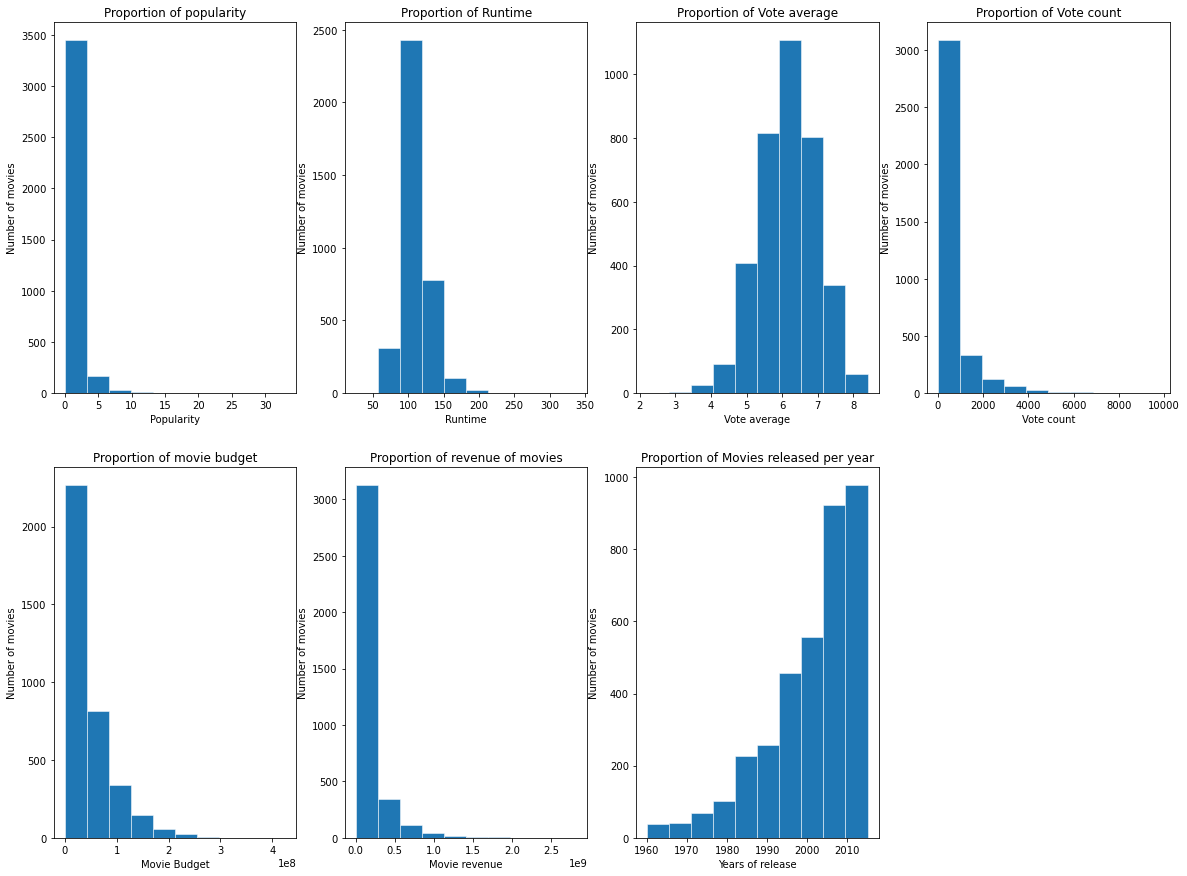

In [21]:
## Plotting the continous features versus the Number of Movies to understand how the different features compare quantitatively:


plt.figure(figsize = (20,15))

plt.subplot(241)

plt.hist(moviedata.popularity, bins=10, linewidth=0.5, edgecolor="white")

plt.title("Proportion of popularity")

plt.xlabel("Popularity")

plt.ylabel("Number of movies")



plt.subplot(242)

plt.hist(moviedata.runtime, bins=10, linewidth=0.5, edgecolor="white")

plt.title("Proportion of Runtime")

plt.xlabel("Runtime")

plt.ylabel("Number of movies")



plt.subplot(243)

plt.hist(moviedata.vote_average, bins=10, linewidth=0.5, edgecolor="white")

plt.title("Proportion of Vote average")

plt.xlabel("Vote average")

plt.ylabel("Number of movies")



plt.subplot(244)

plt.hist(moviedata.vote_count, bins=10, linewidth=0.5, edgecolor="white")

plt.title("Proportion of Vote count")

plt.xlabel("Vote count")

plt.ylabel("Number of movies")



plt.subplot(245)

plt.hist(moviedata.budget, bins=10, linewidth=0.5, edgecolor="white")

plt.title("Proportion of movie budget")

plt.xlabel("Movie Budget")

plt.ylabel("Number of movies")



plt.subplot(246)

plt.hist(moviedata.revenue, bins=10, linewidth=0.5, edgecolor="white")

plt.title("Proportion of revenue of movies")

plt.xlabel("Movie revenue")

plt.ylabel("Number of movies")


plt.subplot(247)

plt.hist(moviedata.release_year, bins=10, linewidth=0.5, edgecolor="white")

plt.title("Proportion of Movies released per year")

plt.xlabel("Years of release")

plt.ylabel("Number of movies")

## MOVIE BUDGETS ANALYSIS:

In [22]:
moviedata.budget.describe()

count        3653.00
mean     45652832.34
std      45214412.13
min          7755.18
25%      14040500.29
50%      31341561.28
75%      62160970.18
max     425000000.00
Name: budget, dtype: float64

A mean budget of 45,652832.34 dollars versus a median budget of 31,341561.28 suggests that the outliers in the dataset are very influential. This also indicates that the distribution is skewed to the left. Thus the median may be the best measure of the central tendency.

Next, I will visualize the distribution of the movie budgets

Text(0.5, 1.0, 'Movie budget in hundred of millions')

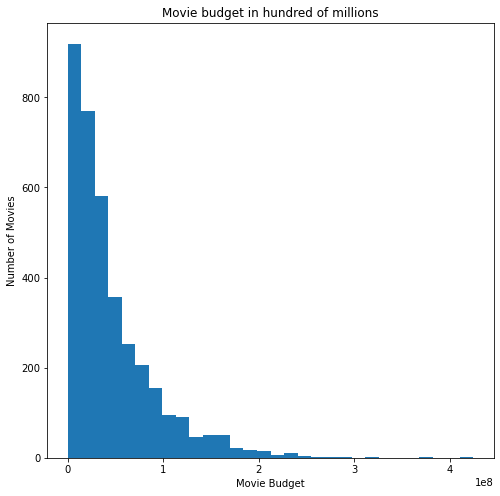

In [23]:
plt.figure(figsize=(8,8))
plt.hist(moviedata.budget,30)
plt.xlabel('Movie Budget')
plt.ylabel('Number of Movies')
plt.title('Movie budget in hundred of millions')

There is an exponential decrease in the distribution of movie budgets with more than 75% of the movies having a budget less than 25 million dollars.

Next, I will take a look at the 10 most expensive movies in the dataset, their release year, the revenue and the profit rate they generated for the producing companies

In [24]:
# adding the profit rate column to the dataset using the budget and revenue columns:

moviedata['profit_rate'] = moviedata['revenue'] / moviedata['budget']

In [25]:
moviedata[moviedata['budget'].notnull()][['title','release_year',
                            'budget', 'revenue', 'profit_rate']].sort_values('budget',
                            ascending=False,ignore_index=True).head(10)

title release_year       budget  \
0                            The Warrior's Way         2010 425000000.00   
1  Pirates of the Caribbean: On Stranger Tides         2011 368371256.20   
2     Pirates of the Caribbean: At World's End         2007 315500574.80   
3                             Superman Returns         2006 292050672.70   
4                                      Titanic         1997 271692064.20   
5                                 Spider-Man 3         2007 271330494.30   
6                                      Tangled         2010 260000000.00   
7                      Avengers: Age of Ultron         2015 257599886.70   
8       Harry Potter and the Half-Blood Prince         2009 254100108.50   
9                                   Waterworld         1995 250419201.70   

        revenue  profit_rate  
0   11087569.00         0.03  
1  990417500.30         2.69  
2 1010653508.00         3.20  
3  423020463.80         1.45  
4 2506405735.00         9.23  
5  936901700.20         3.45  
6  591794936.00         2.28  
7 1292632337.00         5.02  
8  949276533.30         3.74  
9  378087518.50         1.51

From the above, The Warrior's Way is the most expensive movie in the dataset. Interestingly, all the movies that made the list were profitable, with Titanic making nine times the amount invested in producing it. Also, noteworthy is the fact that the most expensive movie on the list earned the lowest return, **suggesting that high budgetting does not always translate to high profitability**. 

However, it is important to note that inflation may have had some influence on the list. 

Next, I will visualize the most expensive movies list on a bar chart:

Text(0.5, 1.0, 'Top 10 Most Expensive Movies')

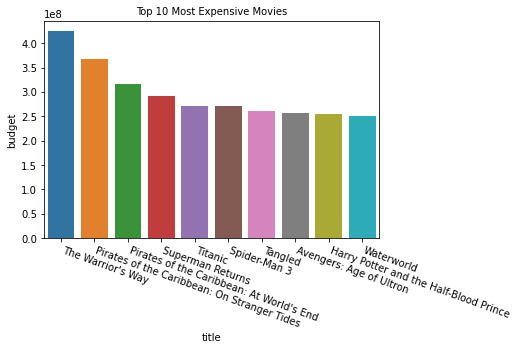

In [26]:
cols = ['title', 'budget']
budget = moviedata.sort_values('budget', ascending=False)[cols].set_index('title')
mostexpensive = budget.head(10)
sns.barplot(data=mostexpensive, x=mostexpensive.index, y='budget')
plt.xticks(ha='left', rotation=-20, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Top 10 Most Expensive Movies', fontsize=10)

Next, I will visualize the relationship between the revenue and budget on a scatter plot

In [27]:
rev_budg = px.scatter(moviedata, x="budget", y="revenue", trendline="ols",
                      title="Relationship between Budget and Revenue")

rev_budg.update_layout(xaxis_title="Budget", 
                 yaxis_title="Revenue")
rev_budg.show()

In [28]:
moviedata['budget'].corr(moviedata['revenue'])

0.5636917736722413

From the correlation coefficient above, it is clear that budget is moderately correlated to budget.

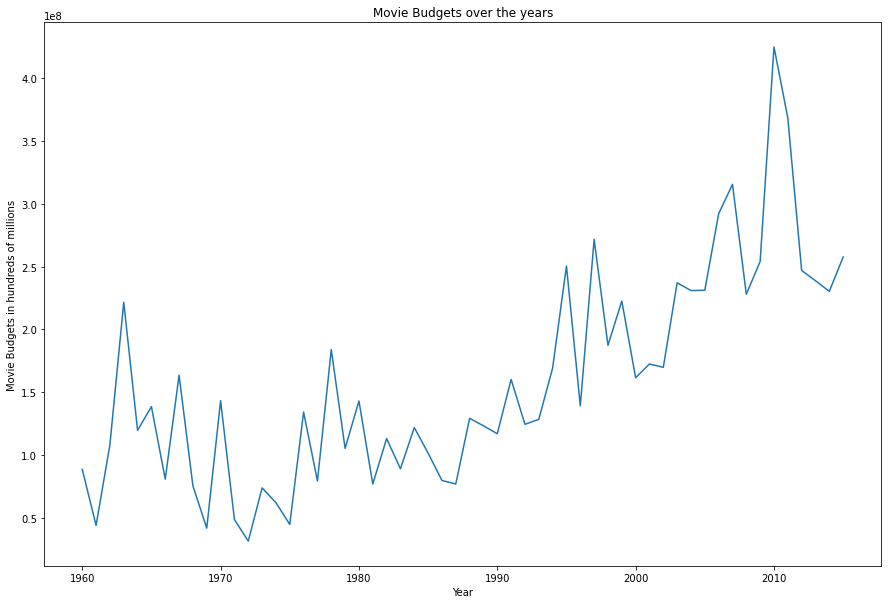

In [29]:
# visualization movie budgets over the years:

plt.figure(figsize=(15,10))
yearlybudg = moviedata[(moviedata['budget'].notnull()) & (moviedata['release_year'] != 'NaT')].groupby('release_year')['budget'].max()
plt.plot(yearlybudg.index, yearlybudg)
plt.xticks(np.arange(1960, 2020, 10.0))
plt.xlabel('Year')
plt.ylabel('Movie Budgets in hundreds of millions')
plt.title('Movie Budgets over the years')
plt.show()

As seen in the graph, movie budgets have increased over the years, with the most expensive movie breaking the 400 million dollar mark at the tail end of the last decade in the years analyzed. Interestingly, there has been a sharp decrease since then, but the trend seems to be on a resurge since 2015.

## MOVIE REVENUE ANALYSIS:

I will start by looking at the top 10 grossing movies in the dataset

In [30]:
top_gross = moviedata[['title', 'release_year',
                       'budget', 'revenue']].sort_values('revenue', ascending=False,ignore_index=True).head(10)
pd.set_option('display.max_colwidth', 100)

top_gross

title release_year       budget       revenue
0                          Avatar         2009 240886902.90 2827123750.00
1                       Star Wars         1977  39575591.36 2789712242.00
2                         Titanic         1997 271692064.20 2506405735.00
3                    The Exorcist         1973  39289276.63 2167324901.00
4                            Jaws         1975  28362748.20 1907005842.00
5    Star Wars: The Force Awakens         2015 183999919.00 1902723130.00
6      E.T. the Extra-Terrestrial         1982  23726245.23 1791694309.00
7                         The Net         1995  31481271.08 1583049536.00
8  One Hundred and One Dalmatians         1961  29179444.83 1574814740.00
9                    The Avengers         2012 208943741.90 1443191435.00

Interestingly, the highest grossing movies in the dataset were mostly released pre-2000s. This suggests that movie revenues may have dropped over time.

To have a better understanding of this, I will visualize the relationship between the profit_rate and the release_year.

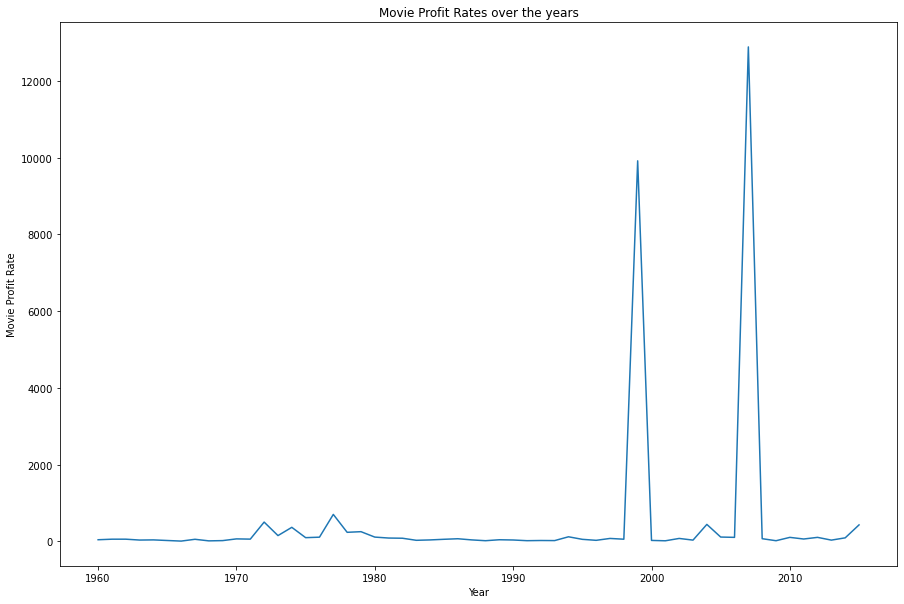

In [31]:
plt.figure(figsize=(15,10))
year_prof  = moviedata[(moviedata['profit_rate'].notnull()) & (moviedata['release_year'] != 'NaT')].groupby('release_year')['profit_rate'].max()
plt.plot(year_prof.index, year_prof)
plt.xticks(np.arange(1960, 2020, 10.0))
plt.xlabel('Year')
plt.ylabel('Movie Profit Rate')
plt.title('Movie Profit Rates over the years')
plt.show()

The biggest profits seem to come from the 2000s negating the higher revenue ratio from pre-2000s.

Next, I will plot the highest movie revenues through the years.

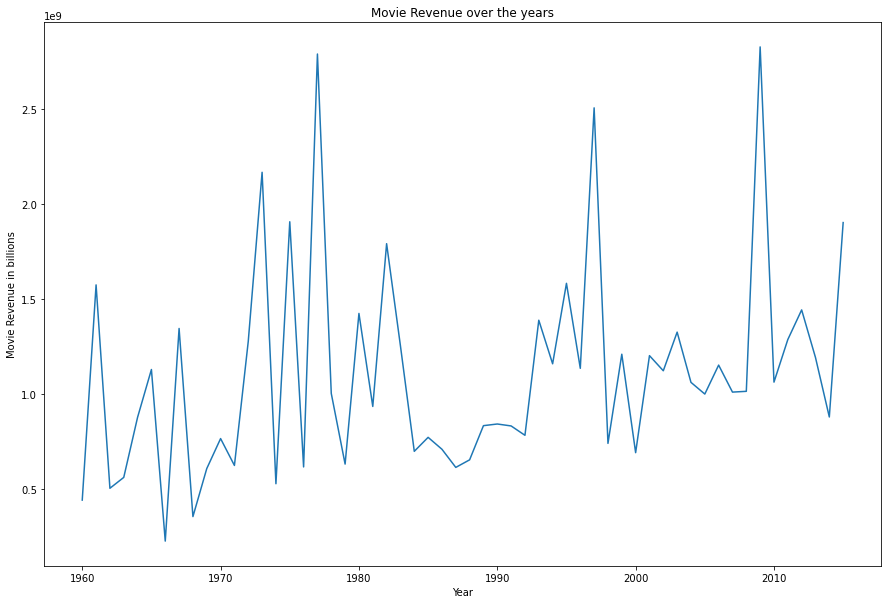

In [32]:
plt.figure(figsize=(15,10))
yearly_rev = moviedata[(moviedata['revenue'].notnull()) & (moviedata['release_year'] != 'NaT')].groupby('release_year')['revenue'].max()
plt.plot(yearly_rev.index, yearly_rev)
plt.xticks(np.arange(1960, 2020, 10.0))
plt.xlabel('Year')
plt.ylabel('Movie Revenue in billions')
plt.title('Movie Revenue over the years')
plt.show()

As seen from the graph above, movie revenues have been rising and falling over the years. Interestingly, the first movie to break 2.5 billion dollar mark was released in the late 70s with no movie coming close to it till late 2000s.

**Which movies are the most successful in the dataset?**

To do this, I will find the movies with the highest profit rates in the dataset.

In [33]:
moviedata[(moviedata['profit_rate'].notnull()) & (moviedata['budget'])][['title','release_year',
                                                     'budget', 'revenue','profit_rate']
                                                    ].sort_values('profit_rate',
                                                    ascending=False,ignore_index=True).head(10)

title release_year     budget      revenue  \
0           Paranormal Activity         2007   15775.03 203346220.10   
1       The Blair Witch Project         1999   32726.32 324645106.00   
2                    Eraserhead         1977   35977.81  25184467.23   
3                Pink Flamingos         1972   62574.73  31287365.59   
4                 Super Size Me         2004   75038.95  32988367.35   
5                   The Gallows         2015   91999.96  39251239.93   
6                    Open Water         2004  150077.90  63111168.01   
7  The Texas Chain Saw Massacre         1974  375894.13 136467258.50   
8                       Mad Max         1979 1201821.60 300455400.30   
9                     Halloween         1978 1002810.21 233989048.60   

   profit_rate  
0     12890.39  
1      9920.00  
2       700.00  
3       500.00  
4       439.62  
5       426.64  
6       420.52  
7       363.05  
8       250.00  
9       233.33

With a profit rate of more than 12,000%, Paranormal Activity is the most successful movie in the dataset. Interestingly, none of the movies on the list cost beyond 2 million dollars to produce.

**Which movies are the least successful in the dataset?**

To do this, I will find the movies with the lowest profit rates in the dataset

In [34]:
moviedata[(moviedata['profit_rate'].notnull()) & (moviedata['budget'])][['title','release_year',
                                                     'budget', 'revenue','profit_rate']
                                                    ].sort_values('profit_rate',
                                                    ascending=True,ignore_index=True).head(10)

title release_year  \
0                                          Charlotte's Web         2006   
1                                             Brother Bear         2003   
2  Teenage Mutant Ninja Turtles II: The Secret of the Ooze         1991   
3                                       Death at a Funeral         2007   
4                                       Death Defying Acts         2007   
5                                            The Samaritan         2012   
6               The Adventurer: The Curse of the Midas Box         2013   
7                                                    Chaos         2005   
8                                            5 Days of War         2011   
9                                               Sweetwater         2013   

        budget  revenue  profit_rate  
0  91941878.45   155.76         0.00  
1 118535264.50   296.34         0.00  
2  40027321.05   124.89         0.00  
3   9465017.24    48.38         0.00  
4  21033371.65  3744.99         0.00  
5  11396931.38  2394.31         0.00  
6  23400833.82  5989.68         0.00  
7  13398759.48 11488.32         0.00  
8  19387960.85 16944.11         0.00  
9   6552233.47  5753.80         0.00

Charlotte's Web produced in 2006 with a budget of over 91 billion dollars is the most disastrous movie release in the dataset. Interestingly, none of the movies which made the list cost less than 6 million dollars suggesting that budgetting heavily on a movie production is not an assurance of it not failing.

**Who are the most successful directors in the dataset?**

To answer this, I will take a look at the directors who directed the movies with the highest profit rates.

In [35]:
director_mov = moviedata.groupby('director')['revenue'].count().sort_values(ascending=False)
director_mov = list(director_mov[director_mov].index)


top_director = moviedata[(moviedata['profit_rate'].notnull())
                       &(moviedata['revenue']) & (moviedata['director'].isin(director_mov))]
pd.DataFrame(top_director.groupby('director')['profit_rate'].mean().sort_values(ascending=False).head(10))

profit_rate
director                         
John Carpenter              22.99
Wes Craven                  11.56
Robert Zemeckis              5.82
Francis Ford Coppola         5.07
Richard Donner               4.90
Clint Eastwood               4.74
Woody Allen                  4.37
Tony Scott                   4.29
Michael Bay                  3.92
Oliver Stone                 3.75

John Carpenter is the most successful director in the dataset. 

Next, I will take a look at the movies he directed, the year he directed them and the profit rate for each movie

In [36]:
moviedata[(moviedata['director'] == 'John Carpenter')&
   (moviedata['profit_rate'].notnull())][['title', 'budget', 'revenue', 'profit_rate', 'release_year']]

title      budget      revenue  profit_rate  \
2048                      The Ward 10000000.00    498974.00         0.05   
2742                Ghosts of Mars 34481667.27  17254173.11         0.50   
7324                       The Fog  2646036.75  56567928.92        21.38   
7906                       Starman 46178924.86  60335611.63         1.31   
8315   Memoirs of an Invisible Man 62160970.18  22312731.53         0.36   
8384          Escape from New York 14389144.83 119909540.20         8.33   
8494              Escape from L.A. 69510836.95  58774700.50         0.85   
8890                     The Thing 22596424.03  31144285.17         1.38   
9484                     They Live  7375564.09  23987045.56         3.25   
9651            Prince of Darkness  5757241.31  27217342.96         4.73   
10489  Big Trouble in Little China 49735160.27  21883470.52         0.44   
10759                    Halloween  1002810.21 233989048.60       233.33   

      release_year  
2048          2010  
2742          2001  
7324          1980  
7906          1984  
8315          1992  
8384          1981  
8494          1996  
8890          1982  
9484          1988  
9651          1987  
10489         1986  
10759         1978

Interestingly, John Carpenter's most successful movies till date were his first two movies titled Halloween and The Fog produced in 1978 and 1980 respectively. His worst movie return was the last movie he directed in 2010 titled, The Ward suggesting a possible decrease in his directing skills. Noteworthingly, his most successful movies were also the ones which cost the least.

**Which director brought in the highest average revenue in the dataset?**

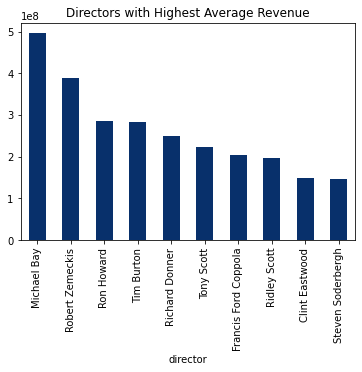

In [37]:
plt.title("Directors with Highest Average Revenue")
moviedata[moviedata['director'].isin(director_mov)
         ].groupby('director')['revenue'].mean().sort_values(ascending=False).head(10).plot(kind='bar', colormap='Blues_r')
plt.show()

Michael Bay is your go-to director for anyone looking to get the highest grossing on their movies!

Text(0.5, 1.0, 'Highest Budget by Directors')

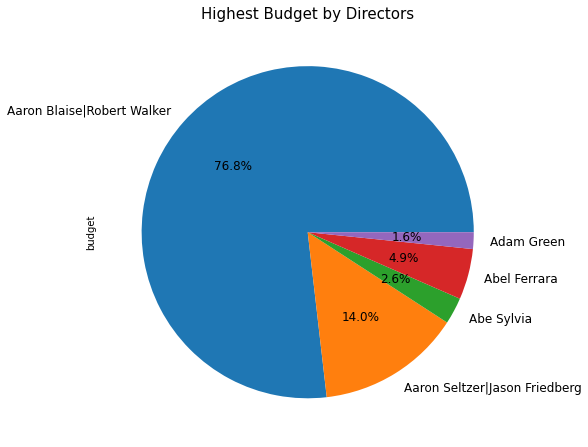

In [38]:
direc_spent = moviedata.groupby('director')['budget'].mean().head()

direc_spent.plot(kind = 'pie', autopct = '%1.1f%%', figsize = (8,8), fontsize = 12)
plt.tight_layout()
plt.title('Highest Budget by Directors', fontsize = 15)

**Which companies generated the most revenues in the dataset?**

To answer this, I will only consider those companies that have made at least 20 movies.

In [39]:
comp = moviedata.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
comp.name = 'companies'

comp_data = moviedata.drop('production_companies', axis=1).join(comp)

# grouping the company columns:

comp_sum = pd.DataFrame(comp_data.groupby('companies')['revenue'].sum().sort_values(ascending=False))
comp_sum.columns = ['Total']
comp_av = pd.DataFrame(comp_data.groupby('companies')['revenue'].mean().sort_values(ascending=False))
comp_av.columns = ['Average']
comp_count = pd.DataFrame(comp_data.groupby('companies')['revenue'].count().sort_values(ascending=False))
comp_count.columns = ['Number']

comp_agg = pd.concat((comp_sum, comp_av, comp_count), axis=1)

comp_agg[comp_agg['Number'] >= 20].sort_values('Number', ascending=False).head()

Total      Average  Number
companies                                             
Paramount Pictures 12185100969.85 162468012.93      75
Universal Pictures  6157750245.07 109959825.80      56
Columbia Pictures   6103154562.06 156491142.62      39
New Line Cinema     2821884350.80  78385676.41      36
Warner Bros.        3827928035.61 119622751.11      32

Based on the output, Paramount Pictures generated the most revenue among the production companies. As expected, they produced the most movies too.

Most voted movies

**Which movies have the most votes in the dataset?**

In [40]:
moviedata[moviedata['vote_count'].notnull()
         ][['title','revenue', 'release_year','vote_count']
          ].sort_values('vote_count', ascending=False, ignore_index=True).head(10)

title       revenue release_year  vote_count
0                          Inception  825500000.00         2010        9767
1                       The Avengers 1443191435.00         2012        8903
2                             Avatar 2827123750.00         2009        8458
3                    The Dark Knight 1014733032.00         2008        8432
4                   Django Unchained  403991051.50         2012        7375
5                   The Hunger Games  656473401.90         2012        7080
6                         Iron Man 3 1137692373.00         2013        6882
7              The Dark Knight Rises 1026712780.00         2012        6723
8                       Interstellar  572690645.10         2014        6498
9  The Hobbit: An Unexpected Journey  965893322.80         2012        6417

The movies released in late 2000s and in the 2010s have the highest votes. This is expected given that the time coincides with the increase in the usage of social media/internet globally which makes it easier for viewers to see movies.

Text(0.5, 1.0, 'Top 10 most voted movies')

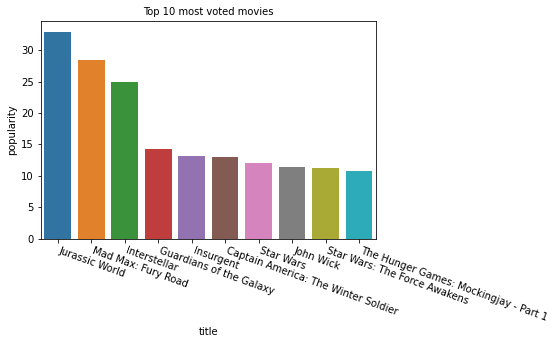

In [41]:
#Visualization of Top 10 most voted movies:

cols = ['title', 'popularity']
movievote = moviedata.sort_values('popularity', ascending=False)[cols].set_index('title')
Top10vote = movievote.head(10)
sns.barplot(data=Top10vote, x=Top10vote.index, y='popularity')
plt.xticks(ha='left', rotation=-20, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Top 10 most voted movies', fontsize=10)

**Which movies are the most popular in the dataset?**

In [42]:
moviedata[moviedata['popularity'].notnull()][['title','popularity','release_year']
                                            ].sort_values('popularity',ascending=False,ignore_index=True).head(10)

title  popularity release_year
0                         Jurassic World       32.99         2015
1                     Mad Max: Fury Road       28.42         2015
2                           Interstellar       24.95         2014
3                Guardians of the Galaxy       14.31         2014
4                              Insurgent       13.11         2015
5    Captain America: The Winter Soldier       12.97         2014
6                              Star Wars       12.04         1977
7                              John Wick       11.42         2014
8           Star Wars: The Force Awakens       11.17         2015
9  The Hunger Games: Mockingjay - Part 1       10.74         2014

90% of the most popular movies in the dataset were released in the 2010s. Interestingly, the only outlier in the list was Star Wars released in 1977. That is a big deal given that many movies have been released since then.

Text(0.5, 1.0, 'Popular Movies')

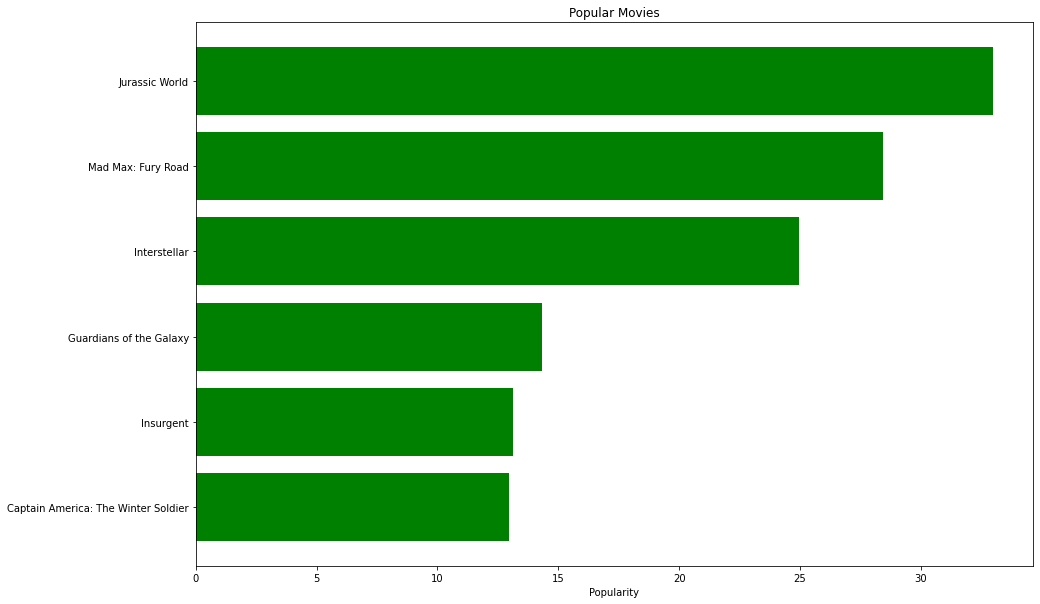

In [43]:
#visualization of the most popular movies

pop_movies = moviedata.sort_values('popularity', ascending = False)

plt.figure(figsize = (15,10))


plt.barh(pop_movies['title'].head(6),pop_movies['popularity'].head(6), align = 'center', color = 'green')

plt.gca().invert_yaxis()

plt.xlabel("Popularity")

plt.title("Popular Movies")

**What is the relationship between popularity and revenue generated?**

In [44]:
pop_rev = px.scatter(moviedata, x="popularity", y="revenue", trendline="ols",
                      title="Relationship between Popularity and Revenue")

pop_rev.update_layout(xaxis_title="Popularity", 
                 yaxis_title="Revenue")
pop_rev.show()

With a R-squared value of 0.29, this means that 29% of the variance in the number of movie revenue can be explained by the popularity of the movie

**Did heavily-budgetted movies turn out popular?**

In [47]:
pop_budg = px.scatter(moviedata, x="popularity", y="budget", trendline="ols",
                      title="Relationship between Popularity and Budget")

pop_budg.update_layout(xaxis_title="Popularity", 
                 yaxis_title="Budget")
pop_budg.show()

With a R-squared value of 0.15, this means that 15% of the variance in the movie budget can be explained by the popularity of the movie

**What is the mean rating for all movies based on the voting averages?**

In [49]:
mean_rating = moviedata.vote_average.mean()

mean_rating

6.18617574596222

The mean rating of the movies in the dataset stand at approximately 6 on a scale of 10. This means 60% of the movies were satisfactory to the viewers.

**What is the minimum votes required to be in the top chart given a 95% percentile?**

To do this, I will firstly filter out the movies that qualify for the chart based on the given percentile.

In [50]:
qual_movie = moviedata.query('vote_count >= vote_count.quantile(0.95)')

qual_movie.shape

(183, 17)

In [51]:
minvote = moviedata['vote_count'].quantile(0.95)

minvote

2337.199999999999

According to the output, 183 movies qualify to be in the top chart given a 95% percentile of highest voted movies. On the average, these movies require approximately 2337 votes to make it to the list.

**Time of Movie Release Analysis**

**How many movies were released in each month in the dataset?**

<AxesSubplot:title={'center':'Number of Movies released in a month.'}, xlabel='release_month', ylabel='count'>

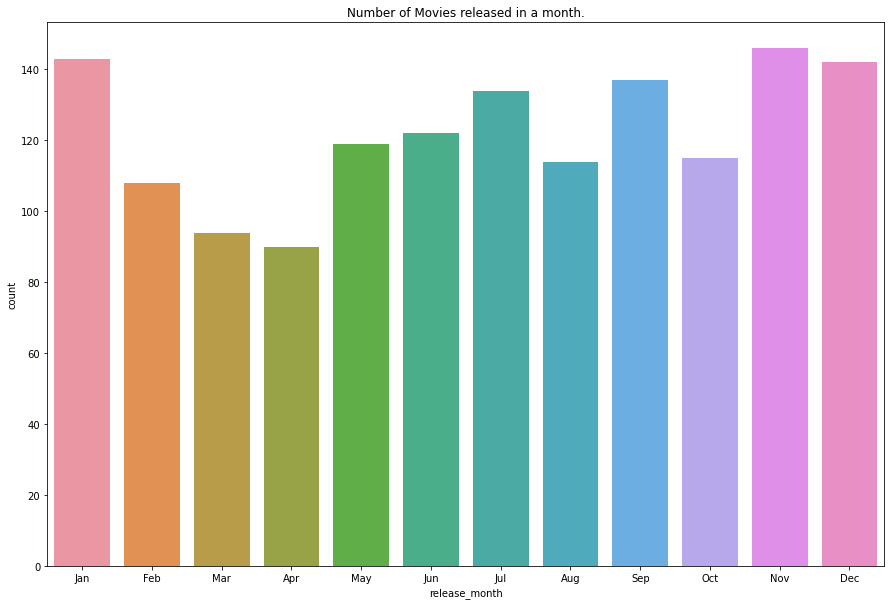

In [54]:
month_ord = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def get_month(x):
    try:
        return month_ord[int(str(x).split('/')[1]) - 1]
    except:
        return np.nan
    
moviedata['release_month'] = moviedata['release_date'].apply(get_month)

plt.figure(figsize=(15,10))
plt.title("Number of Movies released in a month.")
sns.countplot(x='release_month', data=moviedata, order=month_ord)

November, December and January are the most popular months for movie release in the dataset, while there is a sharp decline in movie release in subsequent months, with march and april are the least popular months. The most popular months may be explained by closeness to Christmas and New Year celebrations. 

**Which month do movies generate the most revenue?**

To answer this, I will look at movies which generated revenues above 100,000,000 million dollars

<AxesSubplot:title={'center':'Average Gross Per Month for Blockbuster Movies'}, xlabel='mon', ylabel='revenue'>

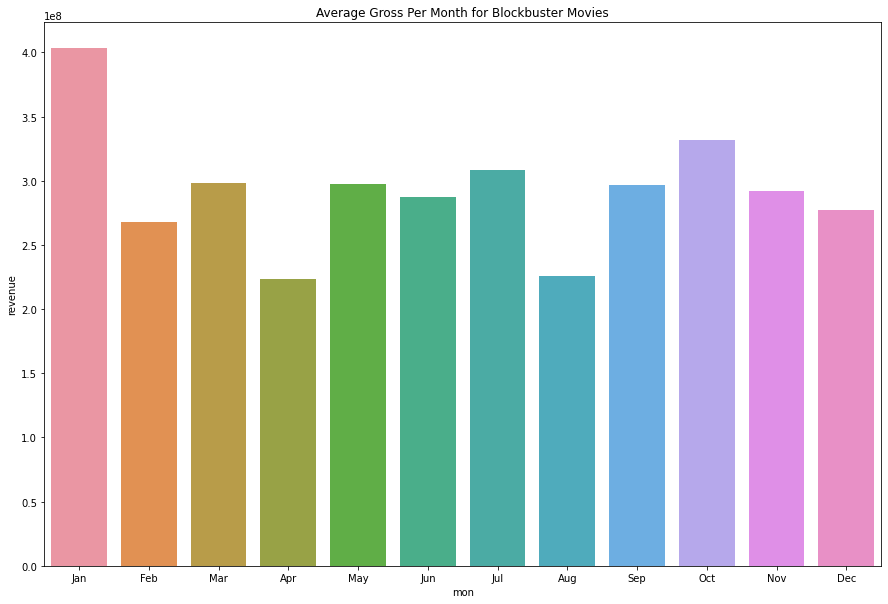

In [61]:
month_mean = pd.DataFrame(moviedata[moviedata['revenue'] > 100000000].groupby('release_month')['revenue'].mean())
month_mean['mon'] = month_mean.index
plt.figure(figsize=(15,10))
plt.title("Average Gross Per Month for Blockbuster Movies")
sns.barplot(x='mon', y='revenue', data=month_mean, order=month_ord)

January recorded the highest gross revenues for blockbuster movies that generated >100,000,000 dollars. Of all the months, April and August performed the least. 

I think there must be something special about April for it to make the list of the least performing month in terms of release and revenue generated.

**Which month did movies recorded the highest profit rate?**

(0.0, 15.0)

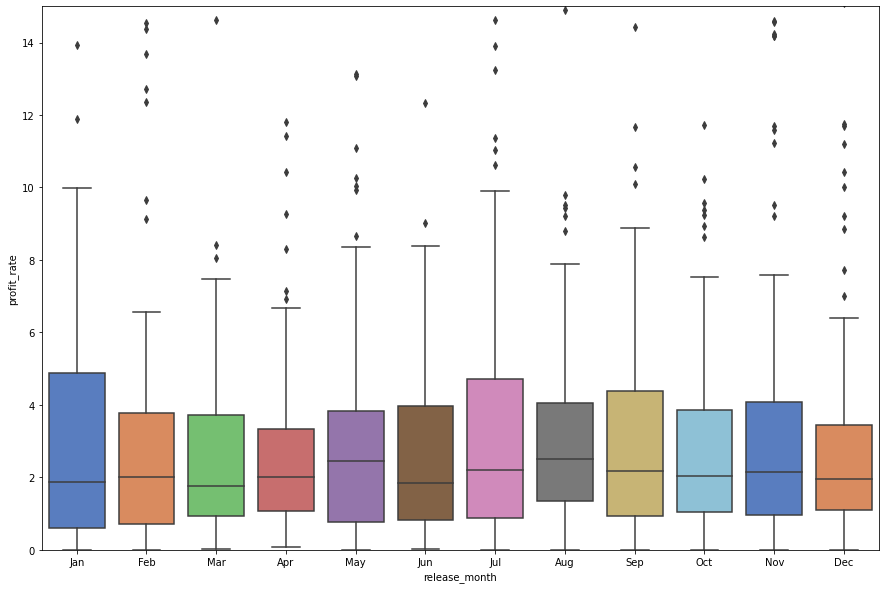

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 10))
sns.boxplot(x='release_month', y='profit_rate', data=moviedata[moviedata['profit_rate'].notnull()], palette="muted", ax =ax, order=month_ord)
ax.set_ylim([0, 15])

Again, January performed the best while April performed the least. July surprisingly performed great!

**Did movie runtime increase over the years?**

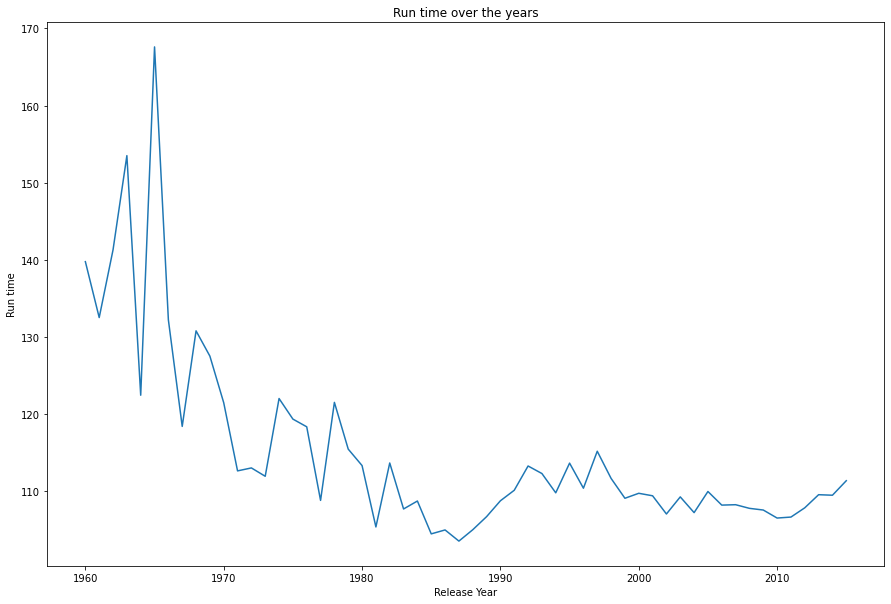

In [65]:
plt.figure(figsize=(15,10))
year_runtime = moviedata[moviedata['release_year'] != 'NaT'].groupby('release_year')['runtime'].mean()
plt.plot(year_runtime.index, year_runtime)
plt.xticks(np.arange(1960, 2014, 10.0))
plt.xlabel('Release Year')
plt.ylabel('Run time')
plt.title('Run time over the years')
plt.show()

From the graph, movie producers and directors have obviously gone for shorter movies over the years. 

**What are the shortest movies ever produced?**

In [66]:
moviedata[moviedata['runtime'] > 0][['runtime', 'title',
                                     'release_year']].sort_values('runtime',ignore_index=True).head(10)

runtime                             title release_year
0       26          Mickey's Christmas Carol         1983
1       63                   Winnie the Pooh         2011
2       66                           9 Songs         2004
3       69              The Land Before Time         1988
4       72              Return to Never Land         2002
5       72                 The Jungle Book 2         2003
6       74         The Great Mouse Detective         1986
7       74                     Fantasia 2000         1999
8       75  Justice League: The New Frontier         2008
9       75                  Cats Don't Dance         1997

Interestingly, each decade from 1980s to 2010s was represented in the least of the shortest movies ever produced.

**What are the longest movies ever produced?**

In [67]:
moviedata[moviedata['runtime'] > 0][['runtime',
                                     'title', 'release_year']].sort_values('runtime',
                                                                                 ascending=False,ignore_index=True).head(10)

runtime                                          title release_year
0      338                                         Carlos         2010
1      248                                      Cleopatra         1963
2      219                                  Heaven's Gate         1980
3      216                             Lawrence of Arabia         1962
4      214                              Gods and Generals         2003
5      213                                   Jodhaa Akbar         2008
6      202                                      Malcolm X         1992
7      201  The Lord of the Rings: The Return of the King         2003
8      200                         The Godfather: Part II         1974
9      199                   The Greatest Story Ever Told         1965

Even better, each decade from 1960s to 2010s was represented in the list of the longest movies ever produced in the dataset

**How correlated are the features measured in the dataset?**

In [68]:
corr = moviedata.corr()

corr.style.background_gradient(cmap='coolwarm')

Interestingly, most of the features are positively correlated with one another. Most noteworthy of the positive correlations are: popularity/vote_count and vote_count/revenue which were strongly correlated.

Also, most of the features were weakly correlated (positive/negative) with profit rate. This suggests that many factors beyond the features listed in the dataset plays a role in how profitable a movie turns out to be.

## MOVIE RECOMMENDATION BASED ON TITLE

Computing the Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview:

In [69]:
#Importing TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Defining a TF-IDF Vectorizer Object. Removing all english stop words such as 'the', 'a'
tf_idf = TfidfVectorizer(stop_words='english')

#Replacing NaN with an empty string
moviedata['overview'] = moviedata['overview'].fillna('')

#Constructing the required TF-IDF matrix by fitting and transforming the data
tf_idf_matrix = tf_idf.fit_transform(moviedata['overview'])

#Outputing the shape of tfidf_matrix
tf_idf_matrix.shape

(3653, 17904)

From the output, this means that 32,786 different words were used to describe the 10866 movies in our dataset. I will use the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies:

In [75]:
# Importing linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Computing the cosine similarity matrix
cosine_sim = linear_kernel(tf_idf_matrix, tf_idf_matrix)

# Defining a function that takes in a movie title as an input and outputs a list of the 10 most similar movies:

#Construct a reverse map of indices and movie titles
indices = pd.Series(moviedata.index, index=moviedata['title']).drop_duplicates()

# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return moviedata['title'].iloc[movie_indices]

In [76]:
# Testing the function to see movies with similaries based on title:

get_recommendations('Jurassic World')

5391     The Lost World: Jurassic Park
10223                    Jurassic Park
5741                        Austenland
7996                            Jaws 3
7995       National Lampoon's Vacation
85                            Vacation
1582                     Adventureland
5584                  The Way Way Back
4467                       Piranha 3DD
6666                         Snow Cake
Name: title, dtype: object

In [77]:
get_recommendations('Interstellar')

3391                  Bad Teacher
8734                   Titan A.E.
10257    Manhattan Murder Mystery
6658             A Scanner Darkly
765               I, Frankenstein
6242                Elizabethtown
7654                  You Kill Me
7126                    Paparazzi
3577                  Dream House
673                Into the Woods
Name: title, dtype: object

In [78]:
get_recommendations('Mad Max: Fury Road')

4072        Swept Away
6966      The Notebook
2006            Legion
10391           Xi yan
6663       A Good Year
7921      Paris, Texas
4008      Femme Fatale
7894              Dune
8704       The 6th Day
3026     The Other Man
Name: title, dtype: object

In [79]:
get_recommendations('Guardians of the Galaxy')

723                   The Best of Me
4966               The Jungle Book 2
687                        The Judge
2283                   The Romantics
8460                           Fargo
4571                Think Like a Man
2164    Tomorrow, When the War Began
2173                           Devil
1724                     The Joneses
5750            The Best Man Holiday
Name: title, dtype: object

In [80]:
get_recommendations('Insurgent')

6770           The Covenant
4635             Cosmopolis
1595     My Sister's Keeper
2672            Shallow Hal
10315     Menace II Society
2555     Music of the Heart
10022      Mo' Better Blues
10303       Beethoven's 2nd
111             Dark Places
7969               Ghoulies
Name: title, dtype: object

## LIMITATION: 

It will be interesting if the dataset included production location details to further analyze how specific location influence the success or failure of a movie release